Ref. Lecture material by Dr. Y. Kawanishi 

Adjusting for google colab 

# Character recognition on Support Vector Machine (SVM) 
Handwriting recognition using the MNIST dataset 

In [1]:
!pip install numpy
!pip install matplotlib

In [7]:
#from sklearn.datasets import fetch_mldata # version <= 0.21
from sklearn.datasets import fetch_openml # version >= 0.22
from sklearn.model_selection import train_test_split

In [8]:
#from sklearn.svm import LinearSVC as Classifier
from sklearn.ensemble import RandomForestClassifier as Classifier
#from sklearn.ensemble import AdaBoostClassifier as Classifier

In [9]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [12]:
#mnist = fetch_mldata("MNIST original", data_home=".")
mnist_X, mnist_y = fetch_openml('mnist_784', version=1, data_home=".", return_X_y=True)
#data = np.asarray(mnist.data, np.float32)
x_all = mnist_X.astype(np.float32) / 255
y_all = mnist_y.astype(np.int32)
#data_train, data_test, label_train, label_test = train_test_split(data, mnist.target, test_size=0.2)
data_train, data_test, label_train, label_test = train_test_split(x_all,y_all, test_size=0.2, random_state=42)

In [13]:
classifier = Classifier()
classifier.fit(data_train, label_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
result = classifier.predict(data_test)

In [15]:
cmat = confusion_matrix(label_test, result)
print(cmat)

[[1325    0    5    1    1    0    3    2    5    1]
 [   0 1580    3    8    2    1    0    3    2    1]
 [   4    3 1337    2    2    2    8    9   10    3]
 [   1    0   28 1357    0   10    0   19   10    8]
 [   1    0    3    0 1251    0    5    4    2   29]
 [   3    3    1   18    3 1222    9    1   10    3]
 [   3    1    0    0    4    9 1376    0    3    0]
 [   2    5   19    0    6    0    0 1454    3   14]
 [   0    6   11   15    5    8    4    4 1294   10]
 [   6    6    4   17   18    4    1   12    7 1345]]


In [16]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(label_test, result)
print(acc)

0.9672142857142857


# Confirmation of characters 
One piece of MNIST data can be converted to image data by passing through the following function.

In [17]:
def to_image(feat):
    return feat.reshape(28, 28)

In [18]:
img = to_image(data_test[50])

In [19]:
%matplotlib inline
import matplotlib.pylab as plt

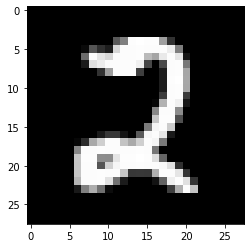

In [20]:
plt.imshow(img, cmap="gray")

plt.show()

In [21]:
classifier.predict([data_test[50]])

array([2], dtype=int32)


# Deep Learning

In [23]:
#from sklearn.datasets import fetch_mldata # version <= 0.21
from sklearn.datasets import fetch_openml # version >= 0.22
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation, Dropout
from keras.utils.np_utils import to_categorical

In [30]:
#mnist = fetch_mldata("MNIST original", data_home=".")
mnist_X, mnist_y = fetch_openml('mnist_784', version=1, data_home=".", return_X_y=True)
#data = np.asarray(mnist.data, np.float32)
x_all = mnist_X.astype(np.float32) / 255
y_all = mnist_y.astype(np.int32)
#data_train, data_test, label_train, label_test = train_test_split(data, mnist.target, test_size=0.2)
data_train, data_test, label_train, label_test = train_test_split(x_all,y_all, test_size=0.2, random_state=42)

In [25]:
label_train_category = to_categorical(label_train)
label_test_category = to_categorical(label_test)

In [26]:
model = Sequential()

model.add(Dense(100, input_dim=784))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
from keras_tqdm import TQDMNotebookCallback

model.fit(data_train, label_train_category, epochs=20, batch_size=100, validation_split=0.1, verbose=0, callbacks=[TQDMNotebookCallback(leave_inner=True)])

ModuleNotFoundError: ignored

In [ ]:
result = model.predict_classes(data_test, verbose=1)

In [ ]:
cmat = confusion_matrix(label_test, result)
print(cmat)

Change the parameters to see the difference in recognition rate 



*   Try increasing the number of learning: change epoch 
*   Try increasing the number of units in the network layer (try increasing the value in Dense () below)

  model.add(Dense(10)) -> model.add(Dense(100))
*   Try increasing the network layer (add code like the following) 
  model.add(Dense(100))
  model.add(Activation("relu"))
  model.add(Dropout(0.5))


Point
*   Start with a simple model 
*   Training data loss does not decrease (accuracy does not increase) 
　　It's not enough to classify, so let's complicate the model."Increase the number of units" or "Increase layers"
*   The loss of training data does not decrease easily 
  Model can be too complex."Reduce the number of units" or "Reduce layers "
*   The accuracy of the training data is high, but the accuracy of the test data is low. 
  There may be insufficient training data. "Increase data" or "Simplify the model"
*   Although the loss of training data is low, the loss of test data increases steadily. 
  Overfitting. "Reduce the number of units" or "Reduce layers"






# Convolutional Neural Network
Perform CNN that captures data as an image and simultaneously performs image feature extraction and recognition 

In [ ]:
#from sklearn.datasets import fetch_mldata # version <= 0.21
from sklearn.datasets import fetch_openml # version >= 0.22
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils.np_utils import to_categorical

In [ ]:
#mnist = fetch_mldata("MNIST original", data_home=".")
mnist_X, mnist_y = fetch_openml('mnist_784', version=1, data_home=".", return_X_y=True)
#data = np.asarray(mnist.data, np.float32)
x_all = mnist_X.astype(np.float32) / 255
y_all = mnist_y.astype(np.int32)
#data_train, data_test, label_train, label_test = train_test_split(data, mnist.target, test_size=0.2)
data_train, data_test, label_train, label_test = train_test_split(x_all,y_all, test_size=0.2, random_state=42)

In [ ]:
def conv_feat_2_image(feats):
    data = np.ndarray((len(feats), 28, 28, 1),
                      dtype=np.float32)
    for i, f in enumerate(feats):
        data[i]=f.reshape(28,28,1)
    return data

train_images = conv_feat_2_image(data_train)
test_images = conv_feat_2_image(data_test)

In [ ]:
label_train_category = to_categorical(label_train)
label_test_category = to_categorical(label_test)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3, 3), padding='valid'))

model.add(Conv2D(64, (3, 3), padding='valid'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3, 3), padding='valid'))

model.add(Flatten())

model.add(Dense(200))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
from keras_tqdm import TQDMNotebookCallback

model.fit(train_images, label_train_category, epochs=10, batch_size=100, validation_split=0.1, verbose=0, callbacks=[TQDMNotebookCallback(leave_inner=True)])

In [ ]:
result = model.predict_classes(test_images, verbose=1)

In [ ]:
cmat = confusion_matrix(label_test, result)
print(cmat)

# Read and recognize your own image 
Create a folder called train in the My Documents folder, create folders 0, 1,… corresponding to each class under it, and put images in it. 

In [ ]:
import os
from keras.preprocessing import image
from skimage.io import imread
from skimage.transform import resize
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

In [ ]:
# Image loading function (reading all images in a folder) 
def load_images(inputpath):
    imglist = []

    for root, dirs, files in os.walk(inputpath):
        for fn in sorted(files):
            bn, ext = os.path.splitext(fn)
            if ext not in [".bmp", ".jpg", ".png"]:
                continue

            filename = os.path.join(root, fn)
            # Loading of evaluation image (32x32 size color image) 
            testimage = image.img_to_array(image.load_img(filename, target_size=(32, 32)))
            imglist.append(testimage)
    imgsdata = np.asarray(imglist, dtype=np.float32)

    return imgsdata

In [ ]:
# Load images from each class 
imgs0 = load_images("train/0")
imgs1 = load_images("train/1")

In [ ]:
# Make the corresponding label 
labels0 = [0] * len(imgs0)
labels1 = [1] * len(imgs1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils.np_utils import to_categorical

In [ ]:
# Normalize together 
data = np.vstack((imgs0, imgs1))
data /= np.max(data)
labels = labels0 + labels1

In [ ]:
train_images, test_images, label_train, label_test = train_test_split(data, labels, test_size=0.2)

In [ ]:
label_train_category = to_categorical(label_train)
label_test_category = to_categorical(label_test)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3))) # ← カラー画像なので　3 x 32 x 32
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3, 3), padding='same'))

model.add(Flatten())

model.add(Dense(500))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(2)) # Output is 0 folder and 1 folder, so 2 classes 
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
from keras_tqdm import TQDMNotebookCallback

model.fit(train_images, label_train_category, epochs=10, batch_size=100, validation_split=0.1, verbose=0, callbacks=[TQDMNotebookCallback(leave_inner=True)])

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt

In [ ]:
plt.imshow(test_images[0])

plt.show()

In [ ]:
# Check if it is recognized correctly
model.predict_classes(np.asarray([test_images[0]]))

# Use of trained model 

When using as it is 

In [ ]:
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image

basemodel = VGG16(weights='imagenet',  include_top=True)
basemodel.summary()

In [ ]:
# Image loading function (reading all images in a folder) 
def load_images_for_vgg16(inputpath):
    imglist = []

    for root, dirs, files in os.walk(inputpath):
        for fn in sorted(files):
            bn, ext = os.path.splitext(fn)
            if ext not in [".bmp", ".jpg", ".png"]:
                continue

            filename = os.path.join(root, fn)
            # Loading of evaluation image (224x224 size color image) 
            testimage = image.img_to_array(image.load_img(filename, target_size=(224,224)))
            imglist.append(testimage)
    imgsdata = np.asarray(imglist, dtype=np.float32)

    return imgsdata

In [ ]:
# Load images from each class 
imgs0 = load_images_for_vgg16("train/0")
imgs1 = load_images_for_vgg16("train/1")

In [ ]:
# Make the corresponding label 
labels0 = [0] * len(imgs0)
labels1 = [1] * len(imgs1)

In [ ]:
data = np.vstack((imgs0, imgs1))
labels = labels0 + labels1

train_images, test_images, label_train, label_test = train_test_split(data, labels, test_size=0.2)

In [ ]:
# Try to recognize the 0th image 
preds = basemodel.predict(preprocess_input(np.array([test_images[0]])))
results = decode_predictions(preds, top=5)[0]
for result in results:
    print(result)

# Fine tuning

In [ ]:
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image

basemodel = VGG16(weights='imagenet', input_shape=(224, 224, 3), include_top=False)

In [ ]:
# Fix the original network so that it does not change 
for layer in basemodel.layers:
    layer.trainable = False

In [ ]:
x = basemodel.output
x = Flatten()(x)
x = Dense(2, activation='softmax')(x)
model = Model(inputs=basemodel.input, outputs=[x])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
from keras_tqdm import TQDMNotebookCallback

model.fit(train_images, label_train_category, epochs=10, batch_size=100, validation_split=0.1, verbose=0, callbacks=[TQDMNotebookCallback(leave_inner=True)])